# Imports


In [278]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [279]:
import numpy as np
from scripts.gaussian_streaming_clusterer import CluStream
from scripts.gaussian_dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [280]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [281]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

# file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [ ]:
def init_dynamic_clusterer(data=reference_data, threshold=1):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data, clustream_model, drift_detector, colors, ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 12234
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 12 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.476494475747599), np.float64(4.904830087314952), np.float64(7.618032937700098), np.float64(7.628475980325178), np.float64(7.265097910707647), np.float64(6.461562987529871), np.float64(4.7468580802281695), np.float64(6.950747097080404), np.float64(4.3007597625255585), np.float64(5.004363796927712), np.float64(5.65663612521056), np.float64(6.514105927763563), np.float64(2.2116124521602285), np.float64(6.8319262211973015), np.float64(5.1716704224095205), np.float64(4.933070270401059), np.float64(5.120438640767878), np.float64(4.936673375693235), np.float64(4.7504797595919985), np.float64(4.421792400605751), np.float64(4.668072895570234), np.float64(7.169070476835424), np.float64(4.822621350035523), np.float64(4.476923462116357), np.float64(3.8842535601420836), np.float64(7.419905908180007), np.float64(4.360350440848958), np.f

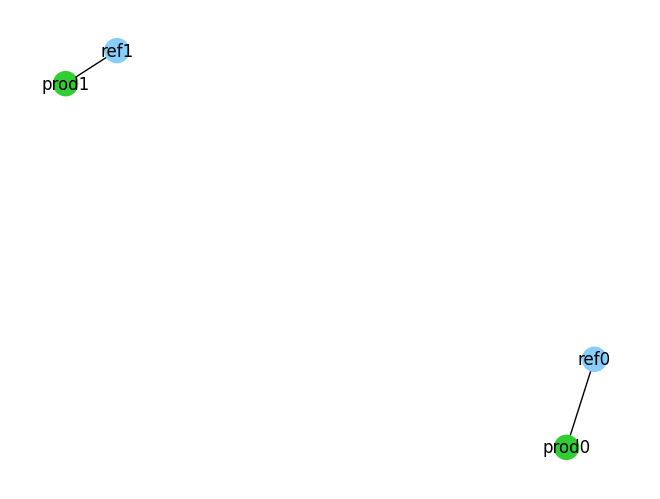

(id: 0) SURVIVED as (id: 0) (score: 0.9795687124746515)
(id: 1) SURVIVED as (id: 1) (score: 0.9834362975193559)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 127 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.506682369444105), np.float64(4.950291074555496), np.float64(7.613123493633051), np.float64(7.628119981151888), np.float64(7.271358788698569), np.float64(6.452362604981639), np.float64(4.74021409663204), np.float64(6.9563082908761915), np.float64(4.302256849990494), np.float64(4.995842552733147), np.float64(5.655589353992564), np.float64(6.52147459527085), np.float64(2.2131346217517196), np.float64(6.826371595777315), np.float64(5.165947047229928), np.float64(4.93730822194125), np.float64(5.121780981962708), np.float64(4.946221189937372), np.float64(4.7556414348412295), np.float64(4.4185606273198035), np.float64(4.650646996224063), np.f

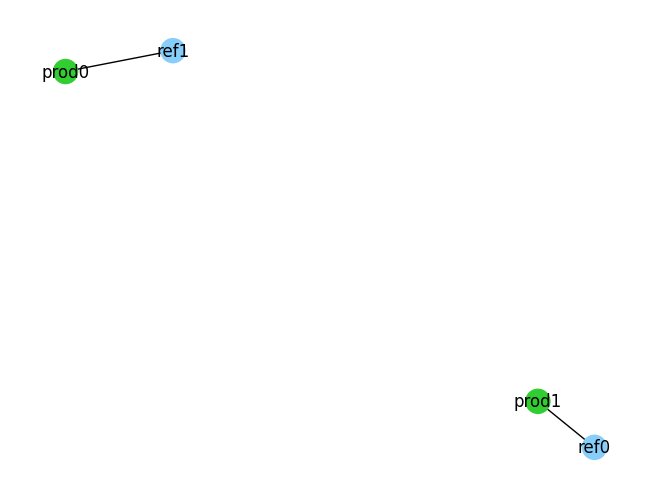

(id: 1) SURVIVED as (id: 1) (score: 0.8810468774061525)
(id: 0) SURVIVED as (id: 0) (score: 0.8559355681479374)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 213 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.723949418826536), np.float64(5.259108090942556), np.float64(7.582704698497599), np.float64(7.622142854061994), np.float64(7.377283472906459), np.float64(6.38802618059245), np.float64(4.626249167052182), np.float64(7.007793044502085), np.float64(4.347345517440275), np.float64(4.91559450192885), np.float64(5.655092391100797), np.float64(6.596262986009771), np.float64(2.2219451679424806), np.float64(6.788417992266742), np.float64(5.0793914794921875), np.float64(5.046400154178793), np.float64(5.115075832063502), np.float64(5.027194735678759), np.float64(4.787487701936201), np.float64(4.44143515012481), np.float64(4.513881598006595), np.flo

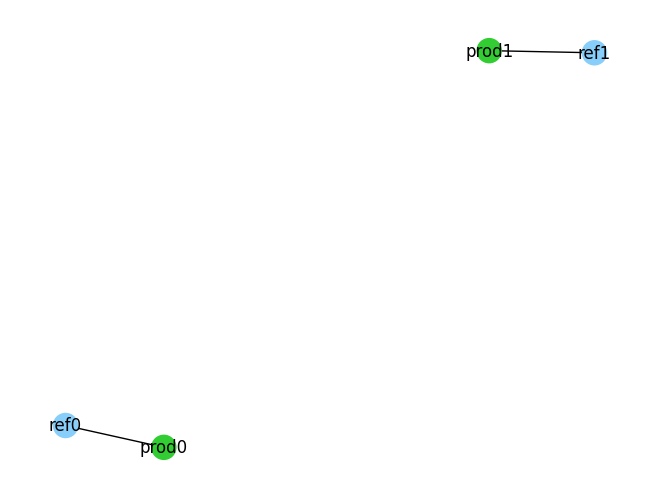

(id: 0) SURVIVED as (id: 0) (score: 0.9162374916547055)
(id: 1) SURVIVED as (id: 1) (score: 0.9694083502202501)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 421 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.826735860557966), np.float64(5.336652901864821), np.float64(7.5667692128048145), np.float64(7.642206109980101), np.float64(7.481653098137148), np.float64(6.369600126820226), np.float64(4.5356019068789735), np.float64(7.056063862257107), np.float64(4.363264727336104), np.float64(4.8855379807051795), np.float64(5.689940526921262), np.float64(6.640212589694608), np.float64(2.2282668467490905), np.float64(6.743402681043071), np.float64(5.008433200979746), np.float64(5.19864543022648), np.float64(5.088074140651251), np.float64(5.054289807555496), np.float64(4.767394378621091), np.float64(4.468639760889033), np.float64(4.439639888783937), np

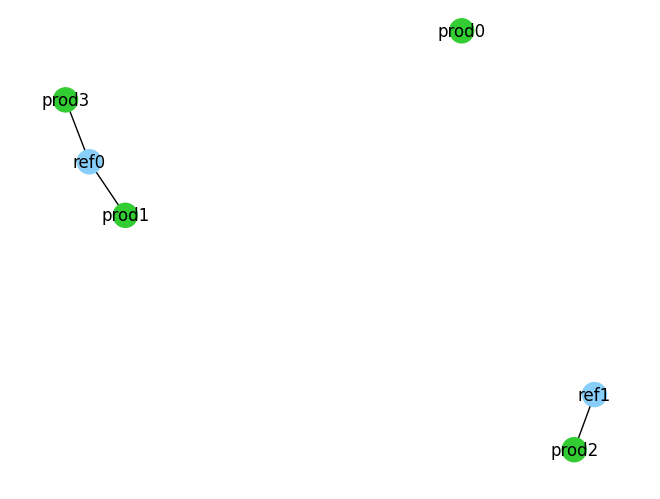

(!) (id: 2) APPEARED --- (score: 0.5431467746428984)
(id: 0) SURVIVED as (id: 0) (score: 0.7239612148258977)
(id: 1) SURVIVED as (id: 1) (score: 0.8684782183557723)
(!) (id: 0) SURVIVED as (id: 3) but a SPLITTING is needed (score: 0.5217054591341795)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 583 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.422903458277385), np.float64(4.889989111158583), np.float64(7.641243749194675), np.float64(7.623358567555745), np.float64(7.192487398783366), np.float64(6.480992476145427), np.float64(4.787348786989848), np.float64(6.9283667008082075), np.float64(4.280418786737654), np.float64(5.0261011653476295), np.float64(5.647029929690891), np.float64(6.488593406147427), np.float64(2.216559522681766), np.float64(6.848944849438137), np.float64(5.209361328019036), np.float64(4.813353021939595), np.

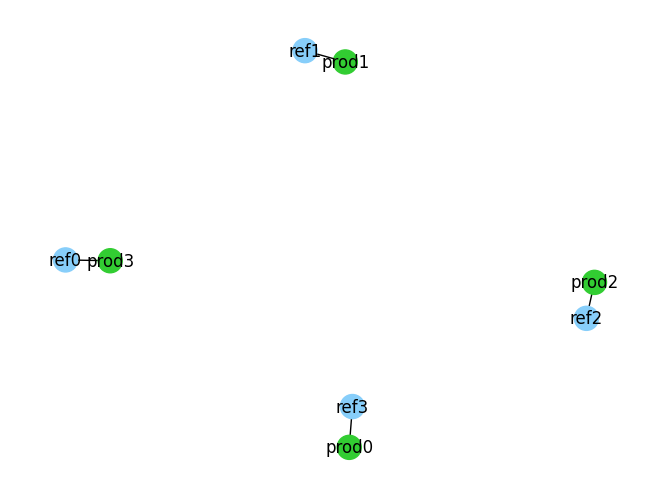

(id: 3) SURVIVED as (id: 3) (score: 0.9232237411058397)
(id: 1) SURVIVED as (id: 1) (score: 0.9786111842217206)
(id: 2) SURVIVED as (id: 2) (score: 0.9086122779620381)
(id: 0) SURVIVED as (id: 0) (score: 0.9829024518608563)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering

ref0 - center: [np.float64(5.442992107288258), np.float64(4.910679894524652), np.float64(7.639332900176177), np.float64(7.622921389502448), np.float64(7.202769472792342), np.float64(6.476475857399605), np.float64(4.77853536605835), np.float64(6.933337160058923), np.float64(4.2819384562002645), np.float64(5.020437627225308), np.float64(5.649259683248159), np.float64(6.494932612857303), np.float64(2.2168890141152047), np.float64(6.8438781403206495), np.float64(5.2023710946779), np.float64(4.823937093889391), np.float64(5.146166131303117), np.float64(4.930544260385874), np.float64(4.77869

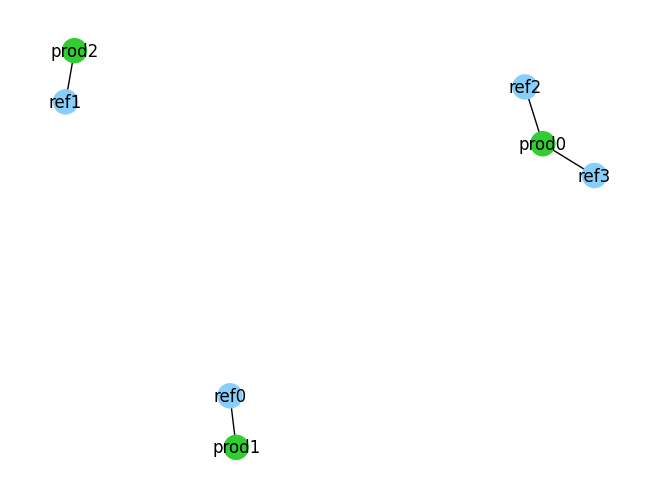

(!) [2, 3] are MERGED in (id: 4) (overlapping scores: [np.float64(0.6696163817660566), np.float64(0.6637378159477638)])
(id: 0) SURVIVED as (id: 0) (score: 0.9829024518608563)
(id: 1) SURVIVED as (id: 1) (score: 0.9796282532706928)

Final macroclusters:
(id: 0)
(id: 1)
(id: 4)

-----------------------------------------------------------------------------------



In [283]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(print_graph=True, print_statistics=True, macroclustering_at_end=True)

Creating the directory...
Drawing ...


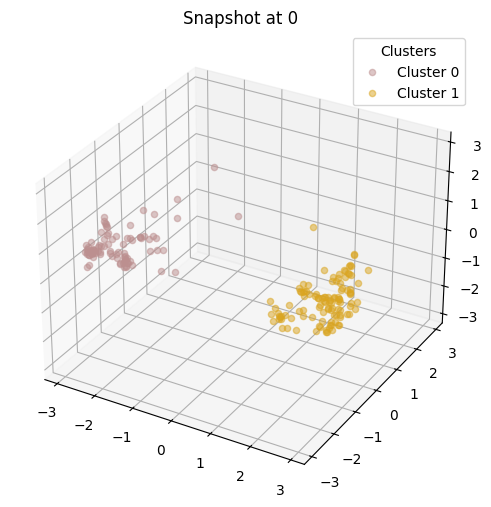

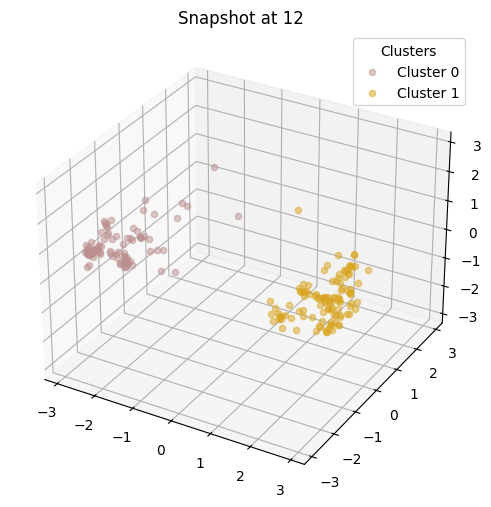

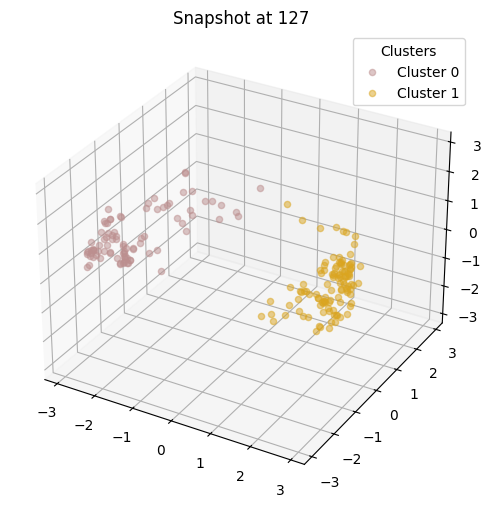

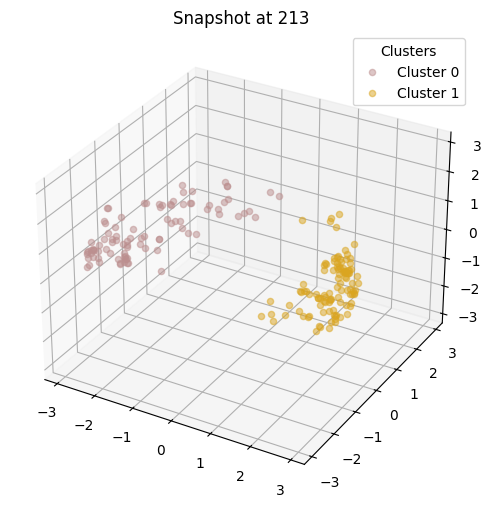

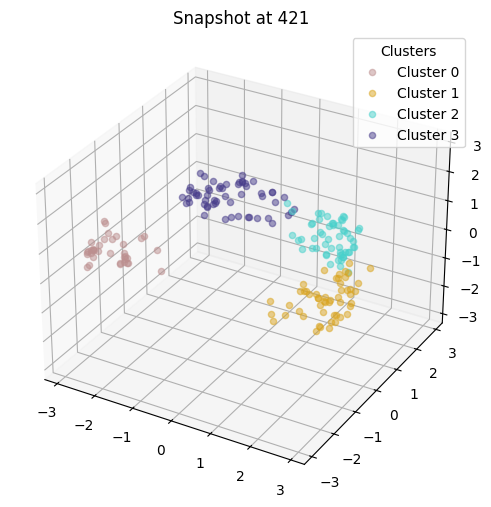

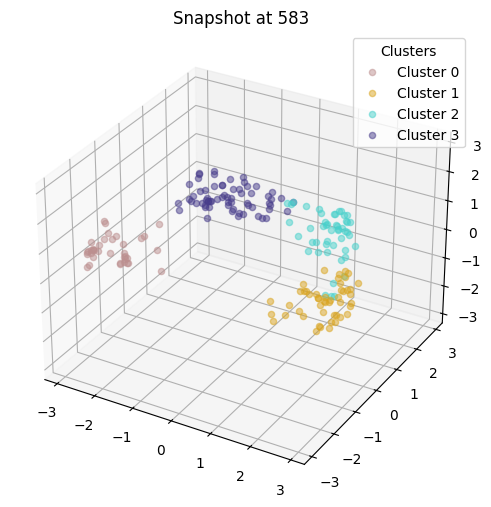

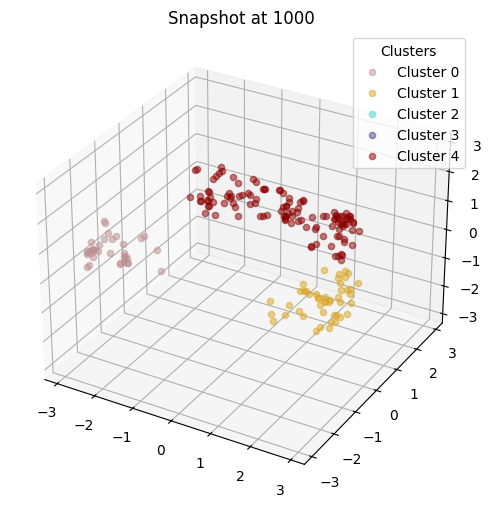

Directory './plots/12234' and its contents removed successfully.


In [284]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=True)